# Initial Data Preparation

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime


%matplotlib inline
pd.set_option('display.max_rows', 500)

-Aim to understand the fimal structure of the data

-Support each step by visual analysis 

## JHU GITHUB csv Data

In [11]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw = pd.read_csv(data_path)

In [12]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [13]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20'],
      dtype='object', length=238)

In [14]:
time_idx = pd_raw.columns[4:]

In [15]:
df_plot = pd.DataFrame({
    'date' : time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [16]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [17]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis= 0)[0:4]

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [18]:
country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [19]:
for each in country_list:
   df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']== each].iloc[:,4::].sum(axis= 0))

c:\users\ozani\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

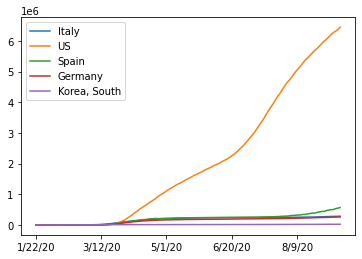

In [20]:

df_plot.set_index(time_idx).plot()

# Data Type Date

In [21]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [24]:
type(df_plot.date[0])

str

In [25]:
from datetime import datetime

In [26]:
datetime.strptime(df_plot.date[0],'%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [27]:
time_idx = [datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]

In [28]:
time_idx[0:5]


[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [29]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [30]:
df_plot['date'] = time_idx

In [31]:
type(df_plot['date'])

pandas.core.series.Series

In [32]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [33]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';', index = False)


# Relational Data Structure

In [36]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw = pd.read_csv(data_path)

In [37]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [38]:
pd_data_base = pd_raw.rename(columns= {'Country/Region':'country',
                                     'Province/State': 'state'})

In [39]:
pd_data_base = pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [40]:
test_pd=pd_data_base.set_index(['state','country']).T

In [49]:
test_pd.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,           'Venezuela'),
            (     

In [50]:
test_pd.stack(level=[0,1])

         state     country           
1/22/20  NaN       Afghanistan               0.0
                   Albania                   0.0
                   Algeria                   0.0
                   Andorra                   0.0
                   Angola                    0.0
                                          ...   
9/11/20  Zhejiang  West Bank and Gaza    29256.0
                   Western Sahara           10.0
                   Yemen                  2007.0
                   Zambia                13323.0
                   Zimbabwe               7479.0
Length: 105768, dtype: float64

In [51]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
105763,9/11/20,Zhejiang,West Bank and Gaza,29256.0
105764,9/11/20,Zhejiang,Western Sahara,10.0
105765,9/11/20,Zhejiang,Yemen,2007.0
105766,9/11/20,Zhejiang,Zambia,13323.0


In [52]:
pd_relational_model=test_pd.stack(level=[0,1]).reset_index()

In [53]:
pd_relational_model=pd_relational_model.rename(columns={'level_0':'date', 0:'confirmed'})
pd_relational_model.tail()

,date,state,country,confirmed
105763,9/11/20,Zhejiang,West Bank and Gaza,29256.0
105764,9/11/20,Zhejiang,Western Sahara,10.0
105765,9/11/20,Zhejiang,Yemen,2007.0
105766,9/11/20,Zhejiang,Zambia,13323.0
105767,9/11/20,Zhejiang,Zimbabwe,7479.0


In [54]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

# date is object , convert to datetime data

In [55]:
pd_relational_model['date']= pd_relational_model.date.astype('datetime64[ns]')

In [56]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

# Group-by apply

In [58]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';', parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date', ascending=True).reset_index(drop=True).copy()
pd_JH_data

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,"Korea, South",1.0
2,2020-01-22,no,Kosovo,0.0
3,2020-01-22,no,Kuwait,0.0
4,2020-01-22,no,Kyrgyzstan,0.0
...,...,...,...,...
62239,2020-09-11,no,Barbados,180.0
62240,2020-09-11,no,Belarus,73784.0
62241,2020-09-11,no,Belgium,91537.0
62242,2020-09-11,no,Albania,11021.0


In [59]:
test_data = pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                       (pd_JH_data['date']> '2020-03-20')]


In [60]:
test_data

,date,state,country,confirmed
15737,2020-03-21,no,Germany,22213.0
15776,2020-03-21,no,US,24508.0
16002,2020-03-22,no,Germany,24873.0
16041,2020-03-22,no,US,33152.0
16269,2020-03-23,no,Germany,29056.0
16309,2020-03-23,no,US,43850.0
16535,2020-03-24,no,Germany,32986.0
16574,2020-03-24,no,US,54112.0
16800,2020-03-25,no,Germany,37323.0
16840,2020-03-25,no,US,66055.0


In [61]:
test_data.groupby(['country']).agg(np.max)


,date,state,confirmed
country,,,
Germany,2020-09-11,no,259735.0
US,2020-09-11,no,6443743.0


In [67]:

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [68]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-11   259735.0
      US      2020-09-11  6443743.0

In [74]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [75]:
def rolling_reg(df_input, col='confirmed'):
    days_back = 3
    result = df_input[col].rolling(
                    window=days_back,
                    min_periods=days_back).apply(get_doubling_time_via_regression, raw=False)
    return result

In [76]:
test_data[['state', 'country','confirmed']].groupby(['state', 'country']).apply(rolling_reg, 'confirmed')

state  country       
no     Germany  15737            NaN
                16002            NaN
                16269       7.417994
                16535       7.142035
                16800       8.012983
                17067       6.954407
                17332       6.501919
                17599       7.390371
                17865      10.136671
                18129      13.541893
                18396      13.781393
                18662      13.140681
                18927      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19992      27.427355
                20259      27.511936
                20524      21.792179
                20790      21.495848
                21057      26.565108
                21324      36.198404
                21589      43.982990
                21854      49.423444
                22120      74.043747
                22386      56.424411
                

In [85]:
pd_DR_result=pd_JH_data[['state', 'country', 'confirmed']].groupby(['state', 'country']).apply(rolling_reg, 'confirmed').reset_index()

In [86]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed': 'confirmed_DR', 
                            'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [99]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.tail()

,index,date,state,country,confirmed
62239,62239,2020-09-11,no,Barbados,180.0
62240,62240,2020-09-11,no,Belarus,73784.0
62241,62241,2020-09-11,no,Belgium,91537.0
62242,62242,2020-09-11,no,Albania,11021.0
62243,62243,2020-09-11,no,Zimbabwe,7479.0


In [100]:
pd_result_larg=pd.merge(pd_JH_data, pd_DR_result[['index','confirmed_DR']], on=['index'], how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR
62239,62239,2020-09-11,no,Barbados,180.0,inf
62240,62240,2020-09-11,no,Belarus,73784.0,385.300175
62241,62241,2020-09-11,no,Belgium,91537.0,98.156735
62242,62242,2020-09-11,no,Albania,11021.0,68.527865
62243,62243,2020-09-11,no,Zimbabwe,7479.0,298.146667


In [101]:
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1.0,NaN
2,2,2020-01-22,no,Kosovo,0.0,NaN
3,3,2020-01-22,no,Kuwait,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0.0,NaN


In [102]:
pd_JH_data['country']=='Germany'

0        False
1        False
2        False
3        False
4        False
         ...  
62239    False
62240    False
62241    False
62242    False
62243    False
Name: country, Length: 62244, dtype: bool

# Filtering the data with groupby apply

In [103]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, 
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [104]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()